In [1]:
# pip install opencv-python opencv-contrib-python matplotlib

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Display images 
def display_image(title, img):
    if img is None:
        print("Error: Image not found")
        return
    plt.figure(figsize=(4,2))
    plt.title(title)
    plt.imshow(img,cmap='gray')
    plt.show()

# STEP 1 : Image Selection -> Choose any image or set of images to work with 

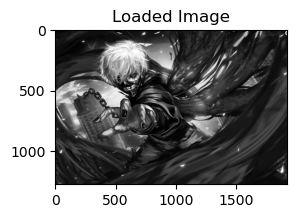

In [7]:
# STEP 1 : Image Selection -> Choose any image or set of images to work with.

image_path = './images/source_image/sample_image.jpg'
image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
# Display the image 
display_image('Loaded Image',image)

# STEP : 2 -> Apply Transformations: Perform multiple transformations on the image(s), such as: Scaling (resizing), Rotation, Translation, Shearing.

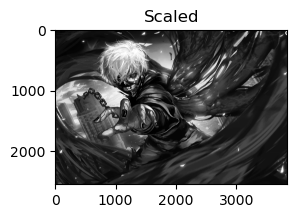

In [6]:
# a)Scaling
scaled_image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
display_image('Scaled',scaled_image)

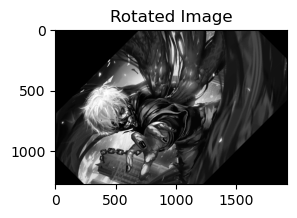

In [13]:
# b)Rotation
(h, w) = image.shape[:2]
center = (w // 2, h // 2)

rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
display_image('Rotated Image',rotated_image)

In [15]:
# # c)Translation

# For one translation
translation_matrix = np.float32([[1, 0, 200], [0, 1, 500]]) 
translated_image = cv2.warpAffine(image, translation_matrix, (w, h))
display_image('Translated Image ({tx}, {ty})', translated_image)

NameError: name 'tx' is not defined

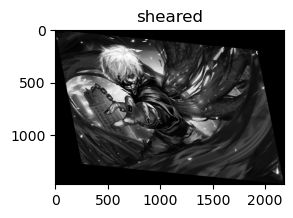

In [11]:
# Define the shear factors
shx = 0.2 
shy = 0.1

(h, w) = image.shape[:2]

# Create the shear matrix
shear_matrix = np.float32([[1, shx, 0], [shy, 1, 0]]) 
# Apply shearing
sheared_image = cv2.warpAffine(image, shear_matrix, (int(w + h * shx), int(h + w * shy)))

display_image('sheared',sheared_image)

# STEP : 3 -> Keypoint Detection and Matching: Use the SIFT algorithm to detect key points in the original and transformed images. Match the key points between the original and transformed images.

In [ ]:
def detect_and_match_keypoints(original_image, transformed_image, image_name):

    # Create SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    keypoints_original, descriptors_original = sift.detectAndCompute(original_image, None)
    keypoints_transformed, descriptors_transformed = sift.detectAndCompute(transformed_image, None)

    # Create a matcher and match descriptors
    bf_matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf_matcher.match(descriptors_original, descriptors_transformed)

    # Draw matches with thicker lines and larger keypoints
    match_image = cv2.drawMatches(original_image, keypoints_original, 
                                   transformed_image, keypoints_transformed, 
                                   matches[:50], None, 
                                   matchColor=(0, 255, 0),  # Green for matches
                                   singlePointColor=(255, 0, 0),  # Red for keypoints
                                   flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

    # Display the matched keypoints
    plt.figure(figsize=(6,6))  # Adjusted figure size for better visibility
    plt.imshow(match_image)
    plt.title(f'Matched Keypoints: {image_name}')
    plt.axis('off')
    plt.show()

detect_and_match_keypoints(image, scaled_image, 'Scaled Image')
detect_and_match_keypoints(image, rotated_image, 'Rotated Image')
detect_and_match_keypoints(image, translated_image, 'Translated Image')
detect_and_match_keypoints(image, sheared_image, 'Sheared Image')